**Introduction**

A startup is described as an early-stage business focused on innovation, aiming to scale rapidly by solving unique market problems. Kecskes, A. and Coeurderoy, R., (2021).

Business question?

As a data scientist in a Venture Capital firm, my firm wants to invest only in startups with high chances of being successful.

ML Task

My task is to build a model that accurately predicts startup success. This model will help the firm to mitigate the risks of investing in startups that eventually fail, making the firm profitable and preventing losses.

In this pipeline, a startup is deemed as failed if it is closed or acquired and deemed as successful if its status is ‘operating’ or ‘ipo’ in the dataset. Most data analysts add ‘acquired’ to the ‘successful’, but this pipeline did otherwise because a startup being acquired could either mean it’s being absorbed into its bigger competition, underselling or any of the other negative ways the acquisition can go. Another reason for adding ‘acquired to the ‘failed’ classifications is because the dataset already has a disproportionate count of ‘operating’ therefore adding acquired to the same group will skew the dataset further.

In [ ]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.compose
import sklearn.decomposition
import imblearn.over_sampling
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import sklearn.linear_model
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics
import sklearn.pipeline
import sklearn.impute
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




** Data Collection**

This data was downloaded from https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase

The data is about selected startups, their funding rounds, their funding in usd, company names and category(industry they are in), the countries and cities they are in, their funding dates, their URL and their home page.

In [ ]:
#load the csv file
from google.colab import files
uploaded = files.upload()


Saving start_ups.csv to start_ups.csv


In [ ]:
df = pd.read_csv('start_ups.csv')
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,1/5/2015,1/5/2015
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,9/4/2014,3/1/2014,10/14/2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,1/30/2014,1/30/2014
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,1/1/2007,3/19/2008,3/19/2008
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,1/1/2010,7/24/2014,7/24/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,4/1/2012,4/1/2012
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,5/13/2012,11/1/2011,3/1/2014
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,1/1/2011,8/1/2014,8/1/2014
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,1/1/2014,1/1/2015,1/1/2015


In [ ]:
df.shape

(66368, 14)

In [ ]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [ ]:
df.dtypes

,0
permalink,object
name,object
homepage_url,object
category_list,object
funding_total_usd,object
status,object
country_code,object
state_code,object
region,object
city,object


**Data Preprocessing**

This section is for data cleaning. Missing values and other errors are checked and handled here.

In [ ]:
#check for missing values
df.isnull().sum()


,0
permalink,0
name,1
homepage_url,5058
category_list,3148
funding_total_usd,0
status,0
country_code,6958
state_code,8547
region,8030
city,8028


**Handling Missing Values and Errors**

All 9 columns with missing values will be handled differently due to their varying numbers and degree of importance of the column to the pipeline.

Dropped 'permalink', 'homepage_url', 'state_code', 'city', 'founded_at', 'region' columns because they have very large counts of missing values and they are also not columns we need for the pipeline.

In [ ]:
# Drop columns by name
df = df.drop(columns=['permalink', 'homepage_url', 'state_code', 'city', 'founded_at', 'region'], axis=1)


In [ ]:
#fill the missing values in 'category' column with 'other' because the category column is necessary in building the pipeline
df['category_list'] = df['category_list'].fillna('other')

In [ ]:
#change date to datetime with errors='coerce' to handle invalid dates
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'],  errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'],  errors='coerce')

#filter out rows with invalid dates
df = df.dropna(subset=['first_funding_at', 'last_funding_at'])

# Extract date features from 'first_funding_at'
df['first_funding_year'] = df['first_funding_at'].dt.year
df['first_funding_month'] = df['first_funding_at'].dt.month

# Extract date features from 'last_funding_at' to help you calculate time difference and use as a new feature
df['last_funding_year'] = df['last_funding_at'].dt.year
df['last_funding_month'] = df['last_funding_at'].dt.month

# Calculate time difference in days
df['funding_duration_days'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

# Drop the original 'first_funding_at' and 'last_funding_at' columns
df = df.drop(columns=['first_funding_at', 'last_funding_at'])


<ipython-input-12-ef7f25f21d18>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_funding_year'] = df['first_funding_at'].dt.year


In [ ]:
#fill in the missing values in 'country_code'
df.country_code.fillna("NaN",inplace=True)

In [ ]:
#The 'funding_total_usd' column is supposed to be 'int' type but it shows as 'object' type, so I checked all the values in the column to see why it appears as object and not int.
df['funding_total_usd']

,funding_total_usd
0,10000000
1,700000
2,3406878
3,2000000
4,-
...,...
66363,1587301
66364,114304
66365,-
66366,18192


In [ ]:
#change all the non-number values in column 'funding_total_usd' to NaN values.
df['funding_total_usd'] = df['funding_total_usd'].replace(r'[^0-9]', np.nan, regex=True)


In [ ]:
#to handle the missing values in the column 'funding_total_usd', I checked for the skewness to determine whether to impute its mean or median values.
df['funding_total_usd'].skew() #check the skewness of column 'funding_total_usd'

100.07715844756858

In [ ]:
#Since the skewness of column "funding_total_usd" is greater than 1, I imputed its missing values with its median
df['funding_total_usd'] = df['funding_total_usd'].fillna(df['funding_total_usd'].median())


In [ ]:
#drop rows with missing values in columns 'name' because their total missing values is less than 1% of the entire dataset.
df = df.dropna(subset=['name'])


**Data Splitting**

In [ ]:
#Data will now be split into test and train sets
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_train: (49755, 11)
df_test: (16585, 11)


<Axes: >

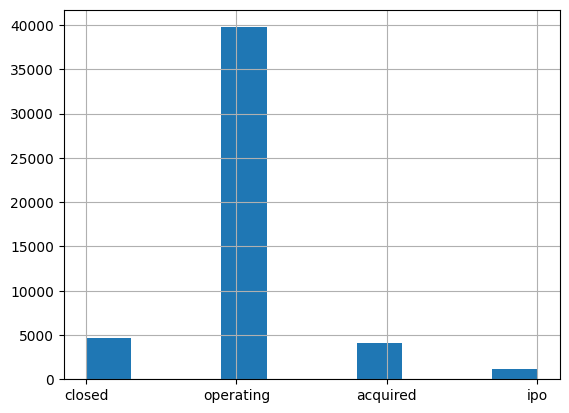

In [ ]:
#show details of the 'status' column
df_train["status"].hist()

Choosing target label and splitting features. The 'status' column is the chosen target. I combined 'operating' and 'ipo' values to mean start up is successful. This is represented numerically as '1' and '0' represents not successful ie, 'closed' and 'acquired' values.

In [ ]:
df_train['status1']=df_train.apply(lambda row: 1 if row['status'] == 'operating'or row['status'] == 'ipo' else 0, axis=1)
df_train.drop(['status'], axis=1, inplace=True)
df_train.rename(columns={'status1': 'status'}, inplace=True)
df_train

,name,category_list,funding_total_usd,country_code,funding_rounds,first_funding_year,first_funding_month,last_funding_year,last_funding_month,funding_duration_days,status
31422,Laboratórios Noli,Medical|Pets|Veterinary,155000,BRA,1,1982,12,1982,12,0,0
47833,Rentah,E-Commerce|Online Rental,125000,USA,1,2014,9,2014,9,0,1
62707,Voucheres,Location Based Services|Mobile,237000,MYS,2,2012,1,2012,1,0,1
23914,Great Lakes NeuroTechnologies,Medical Devices,1900000,USA,1,2015,9,2015,9,0,1
12028,Clusterk,Software,2000000.0,USA,1,2014,2,2014,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32833,LiveTop,Education,110000,ESP,1,2014,1,2014,1,0,1
18140,Enduring Hydro,Renewable Energies,3178867,USA,1,2014,5,2014,5,0,1
4281,Arkansas Regional Innovation Hub,Nonprofits,1250000,USA,2,2013,12,2015,4,511,1
44957,PrePlay,Apps|Augmented Reality|Fantasy Sports|Games|Mo...,8300000,USA,3,2011,1,2013,4,819,1


In [ ]:
x_train = df_train.drop(["status"], axis=1) #drop the chosen target to separate it from remaining features in the train set
y_train = df_train["status"] #train the chosen target; 'status'
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_test = df_test.drop(["status"], axis=1) #drop the chosen target to separate it from remaining features in the test set
y_test = df_test["status"] #test the chosen target; 'status'
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (49755, 10)
y_train: (49755,)
x_test: (16585, 10)
y_test: (16585,)


Feature Engineering

Label Encoding

In [ ]:
#use label encoding to transform all values in all columns in the x_train set to numerical values

# Create a LabelEncoder object
label_encoder = LabelEncoder()
for df in x_train.columns:
  if x_train[df].dtype == 'object':
# Fit and transform the column using LabelEncoder
    combined_data = pd.concat([x_train[df], x_test[df]])
# Convert all values to strings before fitting
    combined_data = combined_data.astype(str)
    label_encoder.fit(combined_data)
    x_train[df] = label_encoder.transform(x_train[df].astype(str))
    x_test[df] = label_encoder.transform(x_test[df].astype(str))

# Print the updated DataFrame
print(x_train)

        name  category_list  funding_total_usd  country_code  funding_rounds  \
31422  29672          25005               3463            16               1   
47833  45375          17977               1709           131               1   
62707  59637          24483               6651            89               2   
23914  22781          24976               4999           131               1   
12028  11798          26954               5374           131               1   
...      ...            ...                ...           ...             ...   
32833  30941          18352                776            38               1   
18140  17497          26493               8960           131               1   
4281    4272          25866               1710           131               2   
44957  42365           4705              16582           131               3   
56166  53562           2098               5374            42               1   

       first_funding_year  first_fundin

Normalizing the dataset

Initially, the dataset was normalized, but it affected the accuracy so badly, it has been commented out.

Same with dimentionaly reduction and oversampling. Oversampling was thought to be needed initially because the data seemed imbalanced from the histogram, but it also affected the accuracy and so has also been commented out.

In [ ]:
#transformer = sklearn.preprocessing.Normalizer().fit(x_train)
#x_train = transformer.transform(x_train)
#x_test = transformer.transform(x_test)
#print(x_train)

In [ ]:
print(y_train.unique()) # Check unique values of y_train

[1 0]


In [ ]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
#lda = LDA(n_components=1)
#x_train = lda.fit_transform(x_train, y_train)
#x_test = lda.fit_transform(x_test, y_test)
#print("x_train:", x_train.shape)
#print("x_test:", x_test.shape)

**Balancing dataset (Oversampling)**

Balancing the chosen target. From the histogram on the 'status' column, the number of startups operating are disproportionately higher than those closed, so I balanced it.

In [ ]:
#sm = imblearn.over_sampling.SMOTE()
#x_train, y_train = sm.fit_resample(x_train, y_train)
#y_train.value_counts()

Train Models

The four models chosen are;
1. SVM
2. Gradient Boosting Machine
3. Decision Tree
4. XGBoost

These models, especially the esemble models were selected because they work better with complex data. The original plan was to use only ensemble models but random forest, even though gave the highest accuracy, hyperparameter tuning with it never worked on my computer, it run for many hours severally but didn't produce results.

1. SVM

In [ ]:
# Step 4: Initialize the SVM model
svm = SVC(random_state=42)
kf = KFold(n_splits=5, shuffle=True)
cv = cross_val_score(svm, x_train, y_train, cv=kf, scoring='accuracy')
print(cv)
print(cv.mean()*100, '%')



[0.82303286 0.82333434 0.82423877 0.82313335 0.81740529]
82.22289217164104 %


2. Gradient Boosting Machine

In [ ]:
grad = GradientBoostingClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True)
cv = cross_val_score(grad, x_train, y_train, cv=kf, scoring='accuracy')
print(cv)
print(cv.mean()*100, '%')

[0.83428801 0.83509195 0.8330821  0.83087127 0.8251432 ]
83.16953070043212 %


3. Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True)
cv = cross_val_score(dt, x_train, y_train, cv=kf, scoring='accuracy')
print(cv)
print(cv.mean()*100, '%')

[0.74937192 0.7602251  0.7603256  0.7576123  0.76565169]
75.86373228821223 %


4. XGBoost

In [ ]:
xg = XGBClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True)
cv = cross_val_score(dt, x_train, y_train, cv=kf, scoring='accuracy')
print(cv)
print(cv.mean()*100, '%')

[0.76404381 0.76494825 0.76866647 0.75710984 0.75409507]
76.17726861621948 %


**Hyperparameter Tuning**
  
  From the four tested models, Gradient Boosting Machine has the highest accuracy, hence it is the best for this dataset.
 RandomizedSearchCV will be used to find random forest'sGBM's optimal hyperparameters as GridSearchVC produced less accuracy. Also, the hyperparameter was manually tuned by looping because it produced better accuracy. The validation set was also used instead of the train set because of suspicion of data leakage which was rendering the overall accuracy as 0%

In [ ]:

x = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(0, 2, 1000)  # Binary classification

#Split data into train, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, X_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define a basic Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],        # Number of boosting stages
    'learning_rate': [0.01, 0.1],      # Learning rate
    'max_depth': [3, 5],               # Maximum depth of individual trees
    'min_samples_split': [2, 5],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],        # Minimum samples required at a leaf node
}

# Perform manual tuning by iterating over hyperparameters (alternative to GridSearchCV)
best_model = None
best_val_score = -np.inf
best_params = {}

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    # Initialize the GBM with the current set of hyperparameters
                    model = GradientBoostingClassifier(
                        n_estimators=n_estimators,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        random_state=42
                    )

                    #  Train the model on the training set
                    model.fit(x_train, y_train)

                    #  Validate on the validation set
                    val_predictions = model.predict(x_val)
                    val_accuracy = accuracy_score(y_val, val_predictions)

                    #  Track the best model based on validation accuracy
                    if val_accuracy > best_val_score:
                        best_val_score = val_accuracy
                        best_model = model
                        best_params = {
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf
                        }

#  Print the best parameters and validation accuracy
print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_val_score)

#  Evaluate the best model on the test set
test_predictions = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best Validation Accuracy: 0.485
Test Accuracy: 0.48


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
x = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(0, 2, 1000)  # Binary classification

# Split data into train, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define a basic Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform manual tuning by iterating over hyperparameters (alternative to GridSearchCV)
best_model = None
best_val_score = -np.inf
best_params = {}

for n_estimators in param_distributions['n_estimators']:
    for learning_rate in param_distributions['learning_rate']:
        for max_depth in param_distributions['max_depth']:
            for min_samples_split in param_distributions['min_samples_split']:
                for min_samples_leaf in param_distributions['min_samples_leaf']:
                    # Initialize the GBM with the current set of hyperparameters
                    model = GradientBoostingClassifier(
                        n_estimators=n_estimators,
                        learning_rate=learning_rate,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        random_state=42
                    )

                    # Train the model on the training set
                    model.fit(x_train, y_train)

                    # Validate on the validation set
                    val_predictions = model.predict(x_val)
                    val_accuracy = accuracy_score(y_val, val_predictions)

                    # Track the best model based on validation accuracy
                    if val_accuracy > best_val_score:
                        best_val_score = val_accuracy
                        best_model = model
                        best_params = {
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf
                        }

# Print the best parameters and validation accuracy
print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_val_score)

# Evaluate the best model on the test set
test_predictions = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best Validation Accuracy: 0.535
Test Accuracy: 0.51


**Model Evaluation**

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Step 9: Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, test_predictions)
print("Classification Report:\n", class_report)

# Step 10: ROC-AUC Score
# Obtain probability estimates for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[54 44]
 [54 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.55      0.52        98
           1       0.52      0.47      0.49       102

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200

ROC-AUC Score: 0.5394157663065227


**Conclusion**

The confusion matrix informs us about how many correct or incorrect predictions the model is able to make.
Below is a summary of the confusion matrix figures;

1.	Instances of True Positives (TP); 48 — This means the model correctly predicted 48 instances as class 1 (Successful; ‘ipo’ and ‘Operating’)

2.	Instances of True Negatives (TN); 54 —This means the model correctly predicted 54 instances as class 0 (failed; ‘closed’ and ‘acquired’)

3.	Instances of False Positives (FP); 44 — This means the model incorrectly predicted 44 instances as class 1, instead of class 0.

4.	Instances of False Negatives (FN); 54 — This means the model incorrectly predicted 54 instances as class 0, instead of class 1.

5.	Hence, for the negative class (class 0), the model predicted 54 instances correctly for the TN and wrongly predicted 44 instances as class 1(FP)

6.	For the positive class (Class 1), the model predicted 48 instances correctly for the (TP) and wrongly predicted 54 instances as class 0(FN)



**Classification Report**


The classification report shows precision, recall, and F1-score for each class.

Below is the explanation for the metrics in each class

For Class 0:
•	Precision (0.50): From the total predictions made by the model for class 0, 50% were correct. This means that out of the total predicted class 0 instances (TP + FP = 54 + 44 = 98), only half were correct (54).

•	Recall (0.55): Out of all true instances of class 0, 55% were correctly identified. This means that out of the real class 0 instances (TN + FN = 54 + 54 = 98), just a little over half were correct predictions.

•	F1-score (0.52): This is the harmonic mean of precision and recall for class 0. It gives a better measure of performance when precision and recall are imbalanced.
For Class 1:

•	Precision (0.52): From the total predictions made by the model for class 1, 52% were correct. Out of 48 + 54 = 102 predictions for class 1, 48 were correct.

•	Recall (0.47): Out of all actual class 1 instances, 47% were correctly identified by the model. This means the model identified 48 correct class 1 instances out of 102.

•	F1-score (0.49): Like class 0, this is the harmonic mean of precision and recall for class 1.
Overall:

•	Accuracy (0.51): The overall accuracy of the model at 51%, means that the model correctly classified just about half of the instances.

•	Macro average: This is the unweighted average of precision, recall, and F1-score across both classes (0 and 1).

•	Weighted average: This includes the number of instances in each class to provide an overall performance score.

ROC-AUC Score
The ROC-AUC score is 0.539. This score measures the area under the Receiver Operating Characteristic (ROC) curve and is often used to evaluate binary classification models.



•	A score closer to 1.0 indicates a good model, while a score closer to 0 indicates a poor model.

•	The model’s score of 0.539 is only slightly better than random guessing, indicating the model is not performing well.





**Discussion**

•	The model has an accuracy of 51%, which is just slightly better than random guessing (50%).

•	Precision and recall are balanced, but neither class is performing significantly better than the other.

•	Overall, the model is struggling to accurately predict both classes, which indicates that the dataset does not have enough information for the model to perform well.